- IMF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cluster field file
df1 = pd.read_csv('M35-BV.csv')

# Atmospheric extinction & reddening correction
# A_V = 0.81, A_B = 1.07, so E(B-V) = 0.26
df1['(B-V)_0'] = df1['B-V'] - 0.26 

# Use the distance modulus to find M_V
# Distance to the cluster = 830 pc
df1['M_V'] = df1['Vmag'] - 5 * np.log10(830) + 5
df1.head()

,RA,Dec,Vmag,Bmag,B-V,(B-V)_0,M_V
0,92.311822,24.523164,14.8876,15.6240,0.7364,0.4764,5.29221
1,92.294745,24.523179,13.2054,13.8349,0.6295,0.3695,3.61001
2,92.210561,24.523631,14.5286,15.9136,1.3850,1.1250,4.93321
3,92.513030,24.523039,13.2363,13.9456,0.7093,0.4493,3.64091
4,92.308890,24.522745,14.0688,14.6482,0.5794,0.3194,4.47341


In [2]:
# Read the offset field file
df2 = pd.read_csv('M35-offsetfield-BV.csv')

# Do the same for the offset field
df2['(B-V)_0'] = df2['B-V'] - 0.26 
df2['M_V'] = df2['Vmag'] - 5 * np.log10(830) + 5
df2.head()

,RA,Dec,Vmag,Bmag,B-V,(B-V)_0,M_V
0,89.343951,28.873367,16.7796,17.6190,0.8394,0.5794,7.18421
1,89.279976,28.872924,14.8281,15.6228,0.7947,0.5347,5.23271
2,89.786743,28.874617,16.5250,17.3319,0.8069,0.5469,6.92961
3,89.645875,28.873476,15.6236,16.4187,0.7951,0.5351,6.02821
4,89.645880,28.873476,15.6236,16.4187,0.7951,0.5351,6.02821


- Plot the HR diagram

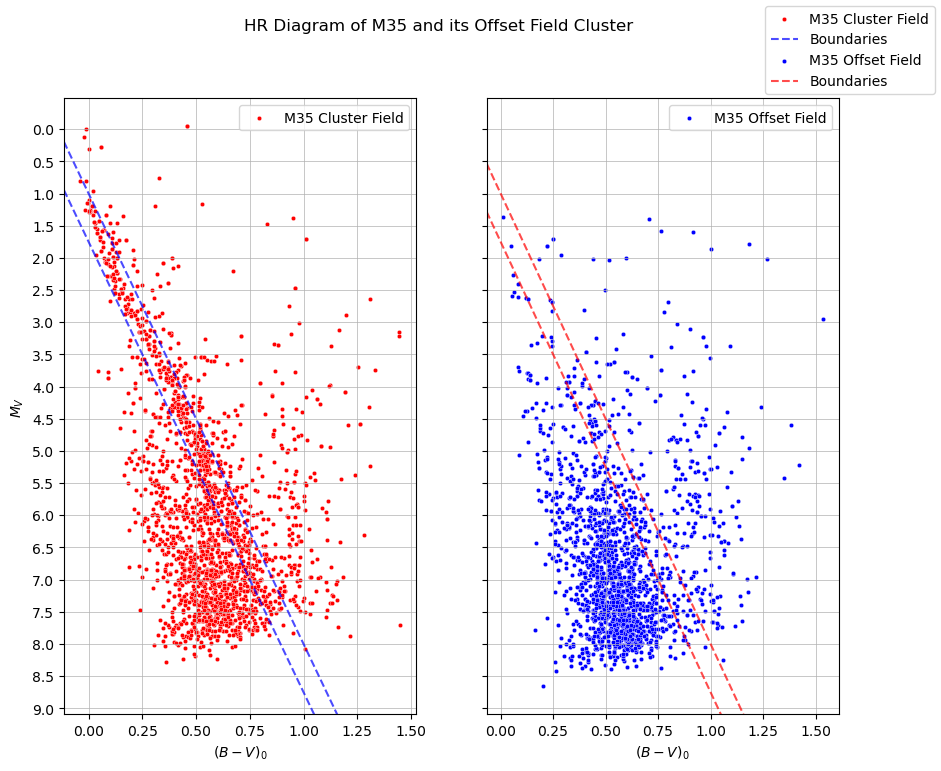

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)
sns.scatterplot(x='(B-V)_0', y='M_V', data=df1, c='r', s=10, ax=axes[0],
                label='M35 Cluster Field')

axes[0].set_xlabel(r'$(B-V)_0$')
axes[0].set_ylabel(r'$M_V$')
axes[0].set_yticks(np.arange(0, 10, 0.5))

x1 = 0.25; y1 = 3.5; x2 = 0.75; y2 = 7
x3 = 0.50; y3 = 4.5; x4 = 1.00; y4 = 8

axes[0].axline((x1, y1), (x2, y2), color='blue', label='Boundaries', linestyle='--', alpha=0.7)

axes[0].axline((x3, y3), (x4, y4), color='blue', linestyle='--', alpha=0.7)

axes[0].grid(visible=True, linewidth=0.5)

sns.scatterplot(x='(B-V)_0', y='M_V', data=df2, c='b', s=10, ax=axes[1],
                label='M35 Offset Field')

axes[1].set_xlabel(r'$(B-V)_0$')
axes[1].set_ylabel(r'$M_V$')

axes[1].axline((x1, y1), (x2, y2), color='red', label='Boundaries', linestyle='--', alpha=0.7)

axes[1].axline((x3, y3), (x4, y4), color='red', linestyle='--', alpha=0.7)

axes[1].grid(visible=True, linewidth=0.5)

plt.gca().invert_yaxis()
fig.suptitle('HR Diagram of M35 and its Offset Field Cluster')
fig.legend()

plt.savefig('HR_Diagram_AutomatedPlans.png', dpi=300)

plt.show()

- Remove Stars from Outside the MS Region

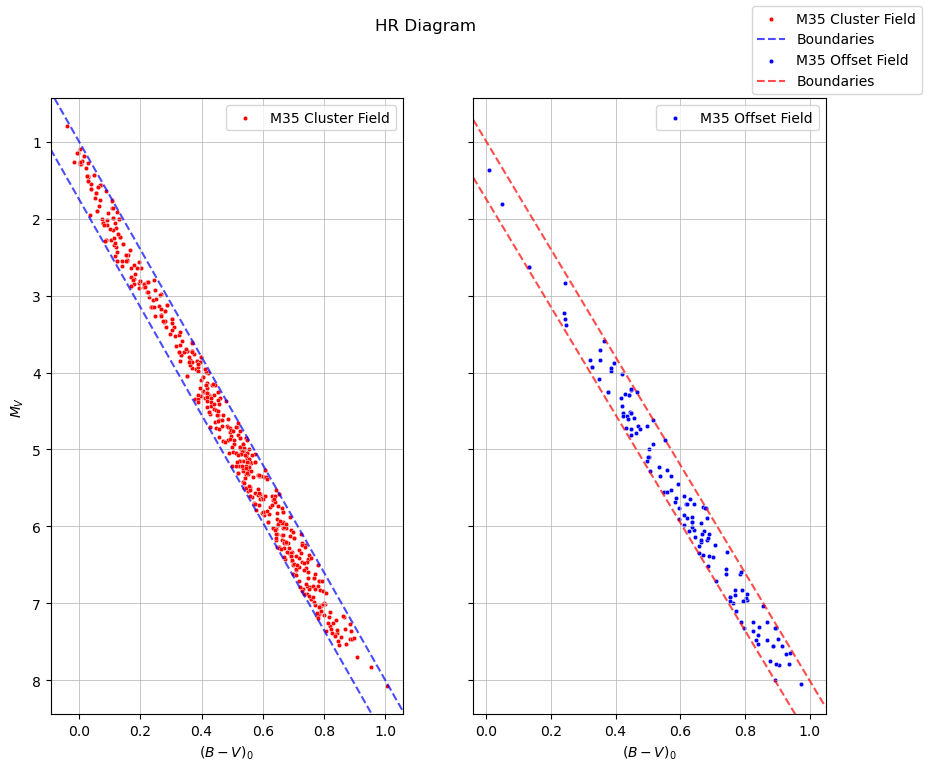

In [4]:
# Equation of the lower-bound line for the cluster
m1_cf = (y2 - y1) / (x2 - x1)
c1_cf = y1 - m1_cf * x1

# Equation of the upper-bound line
m2_cf = (y4 - y3) / (x4 - x3)
c2_cf = y3 - m2_cf * x3

df1['M_V_lb'] = m1_cf * df1['(B-V)_0'] + c1_cf
df1['M_V_ub'] = m2_cf * df1['(B-V)_0'] + c2_cf

df1['diff_lb'] = df1['M_V_lb'] - df1['M_V']
df1['diff_ub'] = df1['M_V_ub'] - df1['M_V']

df1_cleaned = df1.loc[(df1['diff_lb'] > 0) & (df1['diff_ub'] < 0)]

fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)
sns.scatterplot(x='(B-V)_0', y='M_V', data=df1_cleaned, c='r', s=10, ax=axes[0],
                label='M35 Cluster Field')

axes[0].set_xlabel(r'$(B-V)_0$')
axes[0].set_ylabel(r'$M_V$')
axes[0].set_yticks(np.arange(-2, 11))

axes[0].axline((x1, y1), (x2, y2), color='blue', label='Boundaries', linestyle='--', alpha=0.7)

axes[0].axline((x3, y3), (x4, y4), color='blue', linestyle='--', alpha=0.7)

axes[0].grid(visible=True, linewidth=0.5)


df2['M_V_lb'] = m1_cf * df2['(B-V)_0'] + c1_cf
df2['M_V_ub'] = m2_cf * df2['(B-V)_0'] + c2_cf

df2['diff_lb'] = df2['M_V_lb'] - df2['M_V']
df2['diff_ub'] = df2['M_V_ub'] - df2['M_V']

df2_cleaned = df2.loc[(df2['diff_lb'] > 0) & (df2['diff_ub'] < 0)]

sns.scatterplot(x='(B-V)_0', y='M_V', data=df2_cleaned, c='b', s=10, ax=axes[1],
                label='M35 Offset Field')

axes[1].set_xlabel(r'$(B-V)_0$')
axes[1].set_ylabel(r'$M_V$')

axes[1].axline((x1, y1), (x2, y2), color='red', label='Boundaries', linestyle='--', alpha=0.7)

axes[1].axline((x3, y3), (x4, y4), color='red', linestyle='--', alpha=0.7)

axes[1].grid(visible=True, linewidth=0.5)

plt.gca().invert_yaxis()
fig.suptitle('HR Diagram')

fig.legend()
plt.show()

- Polynomial Fitting 

Coefs: [-0.00863777  0.12483352 -0.81070675  2.98082225]


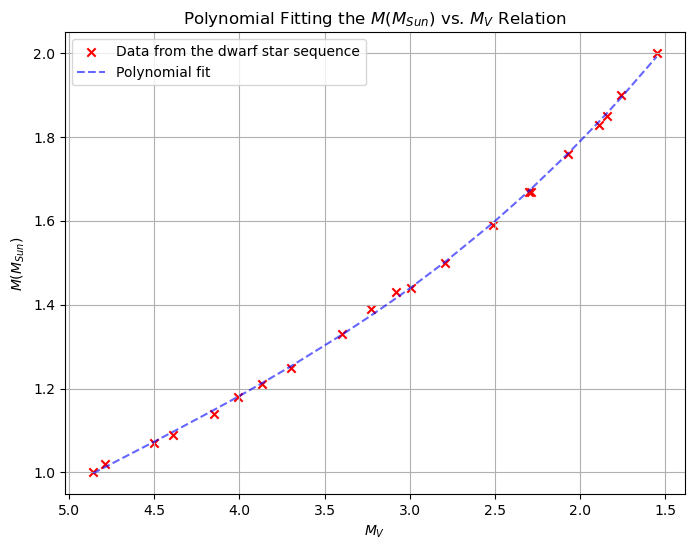

In [5]:
# x (independent variable)
M_V_train = np.array([4.86, 4.79, 4.5, 4.39, 4.15, 4.01, 3.87, 3.7, 
                      3.4, 3.23, 3.08, 2.99, 2.79, 2.51, 2.29, 2.3, 
                      2.07, 1.89, 1.84, 1.76, 1.55])

# y (dependent variable)
M_Sun_train = np.array([1, 1.02, 1.07, 1.09, 1.14, 1.18, 1.21, 1.25, 
                        1.33, 1.39, 1.43, 1.44, 1.5, 1.59, 1.67, 1.67, 
                        1.76, 1.83, 1.85, 1.9, 2])

# Polynomial fitting
degrees = 3
coefs = np.polyfit(M_V_train, M_Sun_train, degrees)
polynomial = np.poly1d(coefs)

print('Coefs:', coefs)

plt.figure(figsize=(8, 6))

plt.scatter(M_V_train, M_Sun_train, marker='x', c='r', 
            label='Data from the dwarf star sequence')
plt.plot(M_V_train, polynomial(M_V_train), c='blue', alpha=0.6,
         linestyle='--', label='Polynomial fit')

plt.xlabel(r'$M_V$')
plt.ylabel(r'$M (M_{Sun})$')
plt.title(r'Polynomial Fitting the $M (M_{Sun})$ vs. $M_V$ Relation')
plt.grid(visible=True)

plt.xticks(np.arange(1.5, 5.5, 0.5))
plt.gca().invert_xaxis()

plt.legend()

plt.savefig('PolynomialFit.png', dpi=300)

plt.show()

In [6]:
df1_cleaned['M_Sun'] = polynomial(df1_cleaned['M_V'])
df2_cleaned['M_Sun'] = polynomial(df2_cleaned['M_V'])

C:\Users\tseng\AppData\Local\Temp\ipykernel_21508\205560631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['M_Sun'] = polynomial(df1_cleaned['M_V'])
C:\Users\tseng\AppData\Local\Temp\ipykernel_21508\205560631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['M_Sun'] = polynomial(df2_cleaned['M_V'])


In [7]:
df1_cleaned.head()

,RA,Dec,Vmag,Bmag,B-V,(B-V)_0,M_V,M_V_lb,M_V_ub,diff_lb,diff_ub,M_Sun
1,92.294745,24.523179,13.2054,13.8349,0.6295,0.3695,3.61001,4.3365,3.5865,0.72649,-0.02351,1.274640
5,92.050458,24.522102,15.6988,16.6819,0.9831,0.7231,6.10341,6.8117,6.0617,0.70829,-0.04171,0.719098
9,92.175783,24.522317,17.0324,18.1485,1.1161,0.8561,7.43701,7.7427,6.9927,0.30569,-0.44431,0.303008
25,92.107995,24.516832,15.9966,17.0103,1.0137,0.7537,6.40121,7.0259,6.2759,0.62469,-0.12531,0.640809
30,92.427573,24.516843,13.9745,14.6645,0.6900,0.4300,4.37911,4.7600,4.0100,0.38089,-0.36911,1.099162


In [8]:
df2_cleaned.head()

,RA,Dec,Vmag,Bmag,B-V,(B-V)_0,M_V,M_V_lb,M_V_ub,diff_lb,diff_ub,M_Sun
1,89.279976,28.872924,14.8281,15.6228,0.7947,0.5347,5.23271,5.4929,4.7429,0.26019,-0.48981,0.919124
22,89.733723,28.871311,15.8038,16.7268,0.9230,0.6630,6.20841,6.3910,5.6410,0.18259,-0.56741,0.692239
112,89.743078,28.855644,17.2484,18.4354,1.1870,0.9270,7.65301,8.2390,7.4890,0.58599,-0.16401,0.216125
128,89.632426,28.851545,13.8887,14.5909,0.7022,0.4422,4.29331,4.8454,4.0954,0.55209,-0.19791,1.117640
129,89.632415,28.851546,13.8887,14.5909,0.7022,0.4422,4.29331,4.8454,4.0954,0.55209,-0.19791,1.117640


- Set Up and Plot an IMF Histogram

In [ ]:
df1_cleaned = df1_cleaned.loc[(df1_cleaned['M_Sun'] >= 1) & 
                              (df1_cleaned['M_Sun'] <= 2)]

df2_cleaned = df2_cleaned.loc[(df2_cleaned['M_Sun'] >= 1) & 
                              (df2_cleaned['M_Sun'] <= 2)]

print('# of (1-2) M_Sun stars in M35:', df1_cleaned.shape[0])
print('# of (1-2) M_Sun stars in the offset field:' ,
      df2_cleaned.shape[0])

binwidth = 0.1 # 0.1
print('Binwidth:', binwidth)

frac_error_list = []
error_bar_list = []
log_m_list = []
log_dndm_list = []

for i in np.arange(1 + binwidth, 2 + binwidth - 0.01, binwidth):
    df1_cleaned_bin = df1_cleaned.loc[(df1_cleaned['M_Sun'] >= (i - binwidth)) & 
                                    (df1_cleaned['M_Sun'] < i)]

    df2_cleaned_bin = df2_cleaned.loc[(df2_cleaned['M_Sun'] >= (i - binwidth)) & 
                                    (df2_cleaned['M_Sun'] < i)]
    
    m = ((i - binwidth) + i) / 2
    log_m = np.log10(m)
    log_m_list.append(log_m)

    dn_cluster = len(df1_cleaned_bin) - len(df2_cleaned_bin)
    delta_dn_cluster = np.sqrt(len(df1_cleaned_bin) + len(df2_cleaned_bin))

    fractional_error = delta_dn_cluster / dn_cluster
    frac_error_list.append(fractional_error)

    dndm = dn_cluster / binwidth
    log_dndm = np.log10(dndm)
    log_dndm_list.append(log_dndm)

    error_bar = (delta_dn_cluster / binwidth) / (dndm * np.log(10))
    error_bar_list.append(error_bar)

    print('\n---')
    print(f'# of ({(i - binwidth):.4g}-{i:.4g}) M_Sun stars in M35:', len(df1_cleaned_bin))
    print(f'# of ({(i - binwidth):.4g}-{i:.4g}) M_Sun stars in the offset field:', 
        len(df2_cleaned_bin))
    
    print(f'Mid bin mass: {m:.3f}')
    print(f'log(m): {log_m:.3g}')

    print('dn(cluster):', dn_cluster)
    print(f'delta dn(cluster): {delta_dn_cluster:.4g}')
    print(f'Fractional error on dn (cluster): {fractional_error:.3f}')

    print('dn/dm:', dndm)
    print(f'log(dn/dm): {log_dndm:.3f}')

print(f'\nMax. fractional error: {max(frac_error_list):.3f}')

# of (1-2) M_Sun stars in M35: 251
# of (1-2) M_Sun stars in the offset field: 44
Binwidth: 0.1

---
# of (1-1.1) M_Sun stars in M35: 44
# of (1-1.1) M_Sun stars in the offset field: 17
Mid bin mass: 1.050
log(m): 0.0212
dn(cluster): 27
delta dn(cluster): 7.81
Fractional error on dn (cluster): 0.289
dn/dm: 270.0
log(dn/dm): 2.431

---
# of (1.1-1.2) M_Sun stars in M35: 46
# of (1.1-1.2) M_Sun stars in the offset field: 15
Mid bin mass: 1.150
log(m): 0.0607
dn(cluster): 31
delta dn(cluster): 7.81
Fractional error on dn (cluster): 0.252
dn/dm: 310.0
log(dn/dm): 2.491

---
# of (1.2-1.3) M_Sun stars in M35: 34
# of (1.2-1.3) M_Sun stars in the offset field: 5
Mid bin mass: 1.250
log(m): 0.0969
dn(cluster): 29
delta dn(cluster): 6.245
Fractional error on dn (cluster): 0.215
dn/dm: 290.0
log(dn/dm): 2.462

---
# of (1.3-1.4) M_Sun stars in M35: 24
# of (1.3-1.4) M_Sun stars in the offset field: 3
Mid bin mass: 1.350
log(m): 0.13
dn(cluster): 21
delta dn(cluster): 5.196
Fractional error on d

- Plot log (dn/dm) vs. log (m)

Error bar for bin 1: 0.126
Error bar for bin 2: 0.109
Error bar for bin 3: 0.094
Error bar for bin 4: 0.107
Error bar for bin 5: 0.092
Error bar for bin 6: 0.126
Error bar for bin 7: 0.097
Error bar for bin 8: 0.100
Error bar for bin 9: 0.150
Error bar for bin 10: 0.131


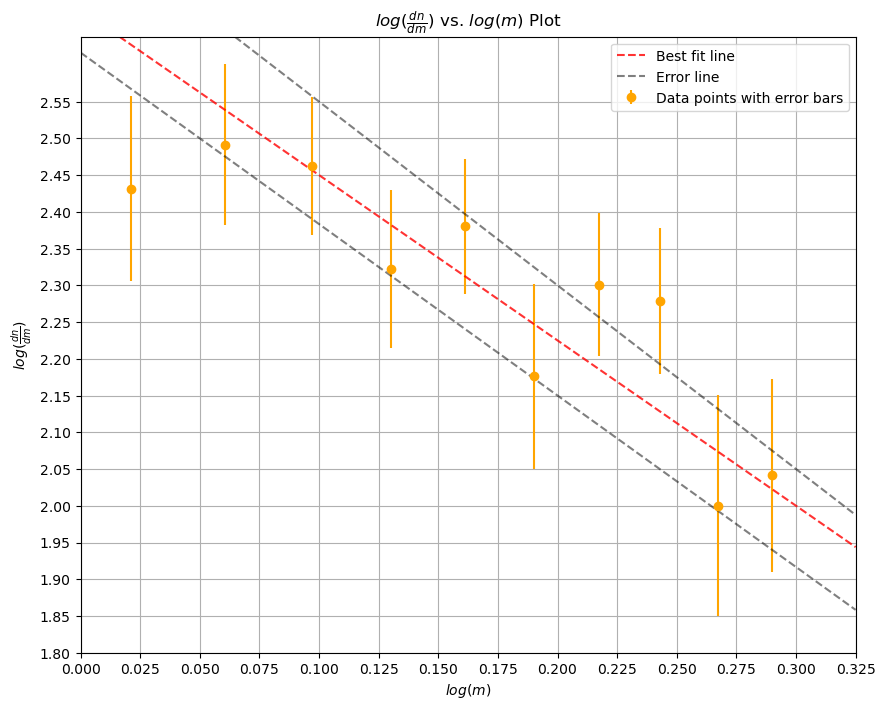

In [10]:
for i, error in enumerate(error_bar_list):
    print(f'Error bar for bin {i + 1}: {error:.3f}')

plt.figure(figsize=(10, 8))

plt.errorbar(x=log_m_list, y=log_dndm_list, yerr=error_bar_list,
             fmt='o', c='orange', label='Data points with error bars')

plt.axline((0.1, 2.45), (0.3, 2.0), c='r', alpha=0.8, linestyle='--', label='Best fit line')

plt.axline((0.3, 2.05), (0.1, 2.55), c='black', alpha=0.5, linestyle='--', label='Error line')

plt.axline((0.05, 2.5), (0.2, 2.15), c='black', alpha=0.5, linestyle='--')

plt.xticks(np.arange(0, 0.35, 0.025))
plt.yticks(np.arange(1.8, 2.6, 0.05))
plt.xlabel(r'$log(m)$')
plt.ylabel(r'$log (\frac{dn}{dm})$')
plt.title(r'$log (\frac{dn}{dm})$ vs. $log(m)$ Plot')

plt.grid(visible=True)
plt.legend()

plt.savefig('IMFplot.png', dpi=300)

plt.show()

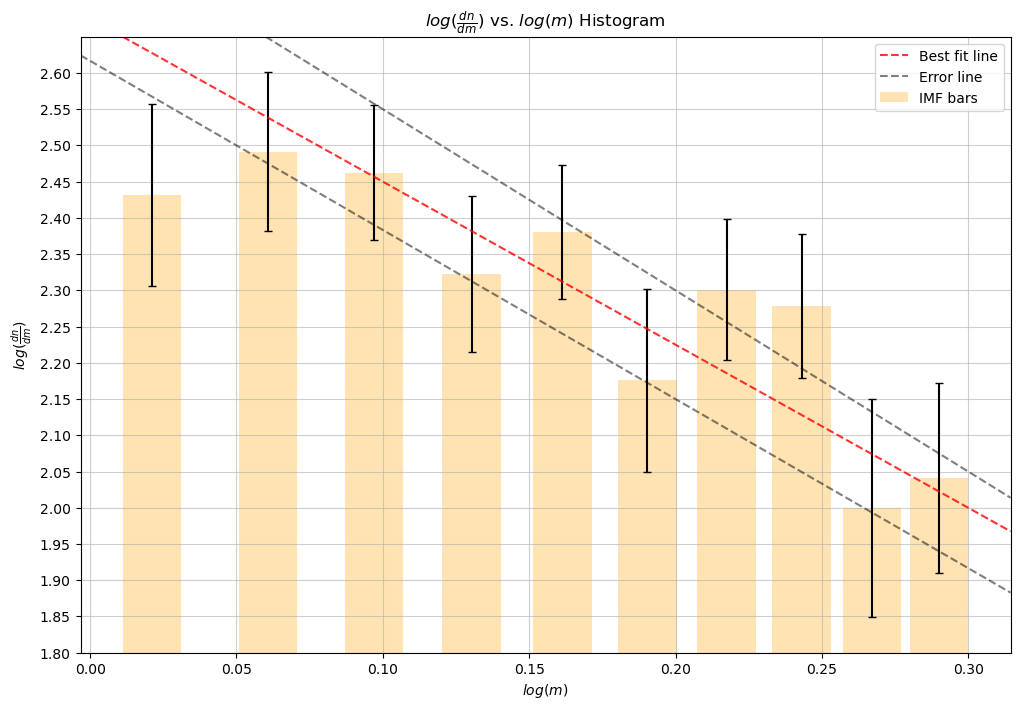

In [55]:
plt.figure(figsize=(12, 8))

# Plot a bar chart with error bars
plt.bar(log_m_list,
        log_dndm_list,
        width=0.02,
        color='orange',
        alpha=0.3,
        yerr=error_bar_list,         # Pass the uncertainties
        ecolor='black',
        capsize=3,
        label='IMF bars')

plt.axline((0.1, 2.45), (0.3, 2.0), c='r', alpha=0.8, linestyle='--', label='Best fit line')

plt.axline((0.3, 2.05), (0.1, 2.55), c='black', alpha=0.5, linestyle='--', label='Error line')

plt.axline((0.05, 2.5), (0.2, 2.15), c='black', alpha=0.5, linestyle='--')

plt.ylim(bottom=1.8, top=2.65) 

plt.xticks(np.arange(0, 0.35, 0.05))
plt.yticks(np.arange(1.8, 2.65, 0.05))
plt.xlabel(r'$log(m)$')
plt.ylabel(r'$log (\frac{dn}{dm})$')
plt.title(r'$log (\frac{dn}{dm})$ vs. $log(m)$ Histogram')

plt.grid(True, alpha=0.6)
plt.legend()

plt.savefig('IMFplot_histogram.png', dpi=300)
plt.show()